# Perceptron multicamadas -MLP com Keras
Prof. Fernando Amaral

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
import math

In [3]:
df = pd.read_csv('AirPassengers.csv', sep=',', parse_dates=True, index_col=0)
data = df.values
np.random.seed(3)

In [4]:
data = data.astype('float32')

In [5]:
train = data[0:125, :]
test = data[125:, :]

In [6]:
def prepare_data(data, lags=1):
    X, y = [], []
    for row in range(len(data) - lags - 1):
        a = data[row:(row + lags), 0]
        X.append(a)
        y.append(data[row + lags, 0])
    return np.array(X), np.array(y)

In [7]:
lags = 1
X_train, y_train = prepare_data(train, lags)
X_test, y_test = prepare_data(test, lags)
y_true = y_test

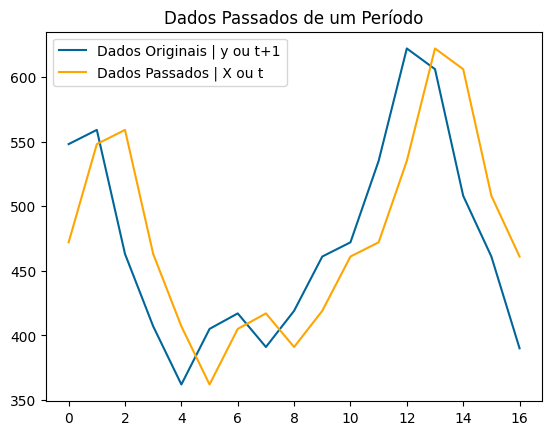

In [8]:
plt.plot(y_test, label='Dados Originais | y ou t+1', color='#006699')
plt.plot(X_test, label='Dados Passados | X ou t', color='orange')
plt.legend(loc='upper left')
plt.title('Dados Passados de um Período')
plt.show()

In [ ]:
mdl = Sequential()
mdl.add(Dense(3, input_dim=lags, activation='relu'))
mdl.add(Dense(1))
mdl.compile(loss='mean_squared_error', optimizer='adam')
mdl.fit(X_train, y_train, epochs=200, batch_size=2, verbose=2)

In [10]:
train_score = mdl.evaluate(X_train, y_train, verbose=0)
print('Pontuação de Treino: {:.2f} MSE ({:.2f} RMSE)'.format(train_score, math.sqrt(train_score)))
test_score = mdl.evaluate(X_test, y_test, verbose=0)
print('Pontuação de teste: {:.2f} MSE ({:.2f} RMSE)'.format(test_score, math.sqrt(test_score)))

Pontuação de Treino: 832.61 MSE (28.86 RMSE)
Pontuação de teste: 3176.55 MSE (56.36 RMSE)


In [11]:
train_predict = mdl.predict(X_train)
test_predict = mdl.predict(X_test)

1/1 [==============================] - 0s 21ms/step


In [12]:
train_predict_plot = np.empty_like(data)
train_predict_plot[:, :] = np.nan
train_predict_plot[lags: len(train_predict) + lags, :] = train_predict

In [13]:
test_predict_plot = np.empty_like(data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(lags*2)+1:len(data)-1, :] = test_predict

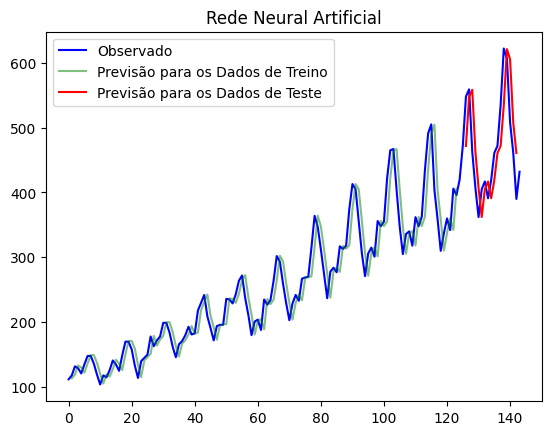

In [14]:
plt.plot(data, label='Observado', color='blue');
plt.plot(train_predict_plot, label='Previsão para os Dados de Treino', color='green', alpha=0.5);
plt.plot(test_predict_plot, label='Previsão para os Dados de Teste', color='red');
plt.legend(loc='best');
plt.title('Rede Neural Artificial')
plt.show()